### 把 hiddenlayers 設計出來。分別有 1. NN 2.CNN 3.RNN

 為啥會出現轉制咧：因為要把它用成我們習慣的寫法！


## 神經網路
我們終於要開始做生命中第一個神經網路...

## 初始準備
keras 
讀進入可以保證 Tensorflow 的一致性！


In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 由 Keras 讀數 MNIST

In [30]:
from keras.datasets import mnist

In [31]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

 看一下有多少比訓練資料 跟測試資料

In [32]:
len(x_train)

60000

In [33]:
len(x_test)

10000

In [34]:
X = x_train[87]

In [35]:
X # 0~255 白~黑

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### 看一下是不是28*28 

In [36]:
X.shape

(28, 28)

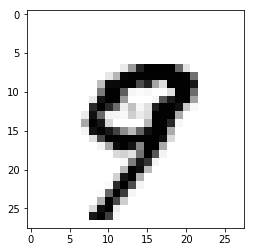

In [37]:
plt.imshow(X,cmap='Greys')

In [38]:
y_train[87]

9

整理一下資料 拉平他

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

## 這邊我們把它分類  2=> [0,0,1,0,0,.....]

In [42]:
from keras.utils import np_utils

In [43]:
y_train = np_utils.to_categorical(y_train ,10)
y_test = np_utils.to_categorical(y_test ,10)

In [44]:
y_train[87] # 9 就變成這樣拉ＸＤ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## 建構神經網路
2層 神經元 4,2

Sequential 為標準型態 一層一層傳的,這是最容易的方式
如果想要有彈性得方式 可能就要用到 functional api 的方法

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD #希望不要他每次的訓練都是一樣的

用 ADD 加層 可是Keras 根本不知道有什麼 所以你要告訴他

In [46]:
model = Sequential() #把神經網路叫做 model 然後打開空白的函數學習機

In [47]:
model_1 = Sequential()

此時 input =784 維 output =10維 然後第一層 ４個神經元 第二層 2個

In [48]:
model.add(Dense(4,input_dim=784))
model.add(Activation('sigmoid')) #把第一層做完拉！

Instructions for updating:
Colocations handled automatically by placer.


然後來做第二層吧！

In [49]:
model.add(Dense(2)) #因為是接續第一層 所以不要告訴他有幾為輸入 然後是幾維度的哦
model.add(Activation('sigmoid')) 

### 最後要輸出10維度 也就是輸出層

In [50]:
model.add(Dense(10))
model.add(Activation('softmax'))  #這行是強制讓他相加等於1

恭喜 第一層神經網路做好拉！

## 組裝
但是我們沒有完全做好哦！
要決定 loss function 一般而言是mes
決定 optimizer 我們用標準的 SGD
設定 learning rate 
然後為了一邊看到結果 
所以加以設定 

metrics =['accuracy']


In [51]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics =['accuracy'])

檢查一下設定的網路如何 

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


# 來算一下是不是真的是這樣

In [53]:
784*4+4  # 有四條路 然後四個常數

3140

In [54]:
4*2+2

10

In [55]:
2*10+10 #2個輸出 10個對應 （亦產生10個函數）

30

## 訓練你的網路
### batch_size :決定一次訓練幾筆資料
### epochs :決定要訓練幾次

In [56]:
model.fit(x_train,y_train,batch_size=100,epochs=20) #你再按一次執行他就會在訓練一次

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - acc: 0.1213
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0897 - acc: 0.1226
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0894 - acc: 0.1261
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0892 - acc: 0.1428
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0891 - acc: 0.1953
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0889 - acc: 0.1996
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0888 - acc: 0.2006
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0886 - acc: 0.1989
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0885 - acc: 0.1973
Epoch 10/20
60000/60000 [===========================

In [57]:
model_1 = Sequential()
model_1.add(Dense(4,input_dim=784))
model_1.add(Activation('sigmoid')) #把第一層做完拉！
model_1.add(Dense(2)) #因為是接續第一層 所以不要告訴他有幾為輸入 然後是幾維度的哦
model_1.add(Activation('sigmoid')) 
model_1.add(Dense(10))
model_1.add(Activation('softmax'))  #這行是強制讓他相加等於1
model_1.compile (loss = 'mse', 
                optimizer = SGD(lr = 0.05),
                metrics = ['accuracy'])
model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [58]:
x_train_1=x_train.reshape(60000,784)
x_test_1=x_test.reshape(10000,784)

In [59]:
#model_1_20 =model_1.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1,validation_data=(x_test,y_test))
model_1_10 = model_1.fit(x_train_1,y_train,batch_size= 100,epochs =20, verbose =1 , validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0905 - acc: 0.0848 - val_loss: 0.0903 - val_acc: 0.0917
Epoch 2/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0901 - acc: 0.0872 - val_loss: 0.0900 - val_acc: 0.0871
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0899 - acc: 0.0918 - val_loss: 0.0898 - val_acc: 0.0925
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0897 - acc: 0.0955 - val_loss: 0.0897 - val_acc: 0.0950
Epoch 5/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0895 - acc: 0.0995 - val_loss: 0.0895 - val_acc: 0.0992
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0894 - acc: 0.1068 - val_loss: 0.0893 - val_acc: 0.1121
Epoch 7/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0892 - acc: 0.1167 - val_loss: 0.0891 - val_acc

## 看一下結果吧 ＸＤ

In [60]:
from ipywidgets import interact_manual

In [61]:
predict = model.predict_classes(x_test)

In [62]:
predict

array([1, 3, 1, ..., 1, 3, 1])

####  由於我們之前轉成 784的向量 現在要轉回去 28*28

In [63]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為：',predict[測試編號])

神經網路判斷為： 3


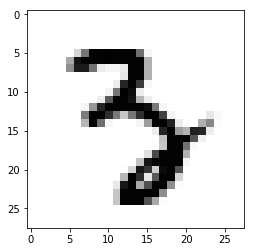

In [64]:
test(87)

In [65]:
interact_manual(test,測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

考試一下 看他如何

In [66]:
score = model.evaluate (x_test,y_test)

10000/10000 [==============================] - 0s 14us/step


In [67]:
print('loss',score[0])
print('正確率',score[1])

loss 0.08625934472084046
正確率 0.2056


### 把訓練好的存起來
以後就可以用拉Ｒ

需要再 termial 安裝 conda install h5py

In [68]:
model_json = model.to_json()
open('stupid_model.json','w').write(model_json)
model.save_weights('stupid_model_weights.h5')

#### 如以後要用 就不需要訓練拉！



怎麼把他讀回來咧～～～

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from keras.models import model_from_json
from keras.optimizers import SGD ## 到這步就已經讀回來惹

In [71]:
ls

4＿19 神經網路練習.ipynb         stupid_model.json
TA 課 神經網路0419.ipynb         stupid_model_weights.h5
Untitled.ipynb                   期中作業.ipynb


In [172]:
model = model_from_json(open('stupid_model.json').read())

In [173]:
model.load_weights('stupid_model_weights.h5')

In [174]:
model.compile(loss = 'mse',optimizer=SGD(lr=0.087))

In [175]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [176]:
X=x_test[87]

In [177]:
X.shape

(28, 28)

In [178]:
X.reshape(1,784)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 156, 253, 253, 255, 253, 253, 253, 165,  18,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 237, 252, 252, 252

In [179]:
[X.ravel()] #沒有[] 就不是一筆 是很多比就不能預測 跟上面的函數一樣

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 156, 253, 253, 255, 253, 253, 253, 165,  18,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 237, 252, 252, 252

In [180]:
model.predict_classes(X.reshape(1,784))

array([3])

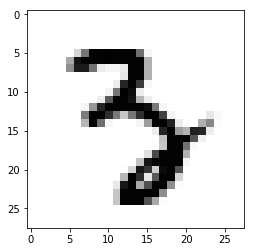

In [181]:
plt.imshow(X,cmap='Greys')

## 助教課

1. normailze

In [184]:
#法1
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [185]:
x_train_1.max()

1.0

In [196]:
#法2
x_train2 = (x_train-x_train.min()) / (x_train.max()-x_train.min())
x_test_2 =(x_test - x_test.min())/ (x_test.max()-x_test.min())

In [197]:
x_train_2.max()

NameError: name 'x_train_2' is not defined

In [189]:
model_2 = Sequential()
model_2.add(Dense(4,input_dim=784))
model_2.add(Activation('sigmoid')) #把第一層做完拉！
model_2.add(Dense(2)) #因為是接續第一層 所以不要告訴他有幾為輸入 然後是幾維度的哦
model_2.add(Activation('sigmoid')) 
model_2.add(Dense(10))
model_2.add(Activation('softmax'))  #這行是強制讓他相加等於1
model_2.compile (loss = 'mse', 
                optimizer = SGD(lr = 0.05),
                metrics = ['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_23 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_24 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [193]:
x_train_1=x_train.reshape(60000,784)
x_test_1=x_test.reshape(10000,784)

model_2_20 = model_2.fit(x_train_1,y_train,batch_size= 100,epochs =20, verbose =1 , validation_data = (x_test_1,y_test))

ValueError: Error when checking target: expected activation_25 to have shape (10,) but got array with shape (1,)

NameError: name 'model_2_20' is not defined

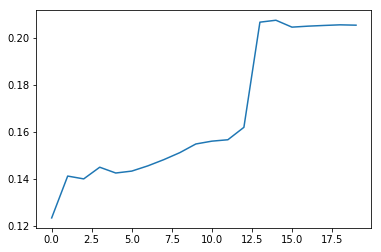

In [194]:
plt.plot(model_1_10.history['acc'])
plt.plot(model_2_20.history['acc'])

plt.title( 'model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1','model_2'],loc ='best')
plt.show()

NameError: name 'model_2_20' is not defined

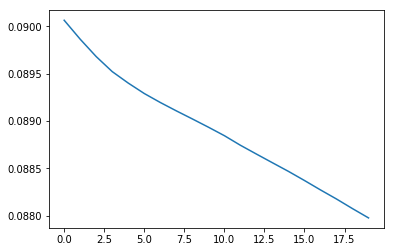

In [192]:
plt.plot(model_1_10.history['val_loss'])
plt.plot(model_2_20.history['val_loss'])

plt.title( 'model training accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1','model_2'],loc ='best')
plt.show()